<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/GP_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# considerations about noise

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, ExpSineSquared
#GaussianProcessRegressor?

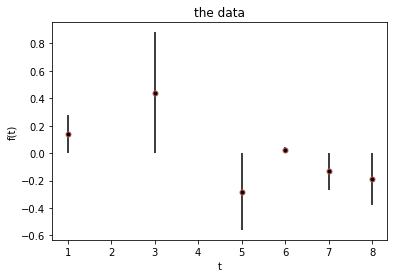

In [32]:

np.random.seed(1)

def f(x):
    """The function to predict."""
    return np.random.rand(len(x))

# ----------------------------------------------------------------------

t = [1., 3., 5., 6., 7., 8.]
t_ = np.atleast_2d(t).T

# Observations
y = f(t_).ravel()
y = y - y.mean()

# evenly sampled time axis
t_pred = np.atleast_2d(np.linspace(0, 10, 1000)).T
# Instantiate a Gaussian Process model
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
# in our model the uncertainty are the same as the deviation from the mean

pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("the data");

# just the kernel

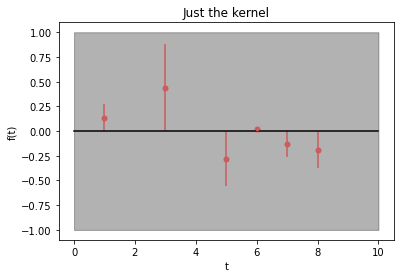

In [18]:
kernel = RBF(10, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='IndianRed')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("Just the kernel");

# No noise: model passes through data 

---

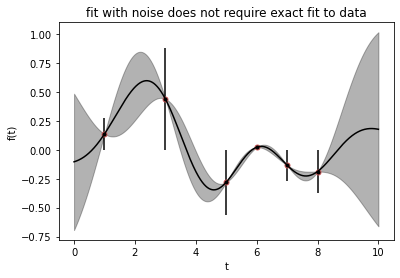

In [22]:
# Add noise and fit to data using Maximum Likelihood Estimation of the parameters
kernel = RBF(10, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,
                             alpha=0) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");

# With noise: model passes through data 


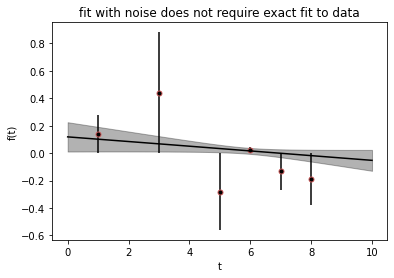

In [23]:
kernel = RBF(10, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,
                             alpha=y**2) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");

# Let's try a more complicated kernel

## with white noise

1**2 * RBF(length_scale=10.1) + WhiteKernel(noise_level=1e-05)


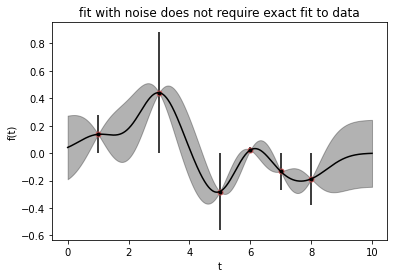

In [28]:
# Add noise and fit to data using Maximum Likelihood Estimation of the parameters
kernel = 1.0 * RBF(length_scale=10.10, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,
                             alpha=0) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");

print(gp.get_params()["kernel"])


## add a periodic component

# these fits do not converge! rerun and you will get a different fit!

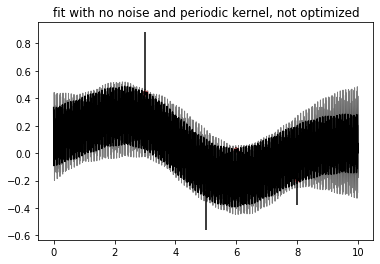

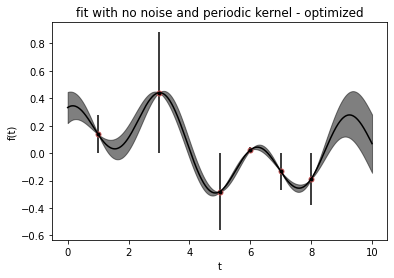

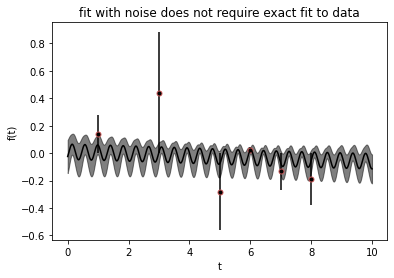

In [35]:
# Add noise and fit to data using Maximum Likelihood Estimation of the parameters
kernel = (1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) + 
         ExpSineSquared(length_scale=10, periodicity=5) + 
         WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1)))


gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=19,
                             alpha=0) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.5, color='k')
pl.title("fit with no noise and periodic kernel, not optimized");

kernel = (1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) + 
         ExpSineSquared(length_scale=10, periodicity=5, periodicity_bounds=(1e-01, 10)) + 
         WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1)))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=19,
                             alpha=0) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.5, color='k')

pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with no noise and periodic kernel - optimized");

kernel = (1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) + 
         ExpSineSquared(length_scale=10, periodicity=5, periodicity_bounds=(1e-01, 10)) + 
         WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1)))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=19,
                             alpha=y**2) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=y, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.5, color='k')

pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");


# Another package: George

In [31]:
!pip install george

     |████████████████████████████████| 1.8MB 2.8MB/s 
     |████████████████████████████████| 153kB 20.7MB/s 
  ERROR: Failed building wheel for george
  Running setup.py clean for george
Failed to build george
    Running setup.py install for george ... done


Initial ln-likelihood: 0.11


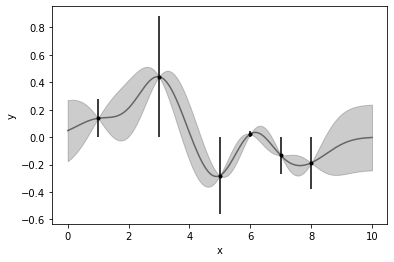

In [37]:
import george
from george import kernels

kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
gp = george.GP(kernel)
gp.compute(t, 0)

pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=y, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))


Initial ln-likelihood: 0.36


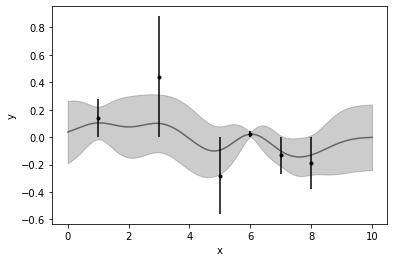

In [39]:
kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
gp = george.GP(kernel)
gp.compute(t, y) # this is the uncertainty! y_err, which in our made up data is =y

pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=y, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
#print("Initial parameters: {0:.2f}".format(*gp.get_params()))


In [45]:
from scipy.optimize import minimize
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))


      fun: -3.051000540203413
 hess_inv: array([[90457.60209656, 12903.30111056],
       [12903.30111056,  1841.62190911]])
      jac: array([1.92847087e-06, 5.91934119e-06])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 18
     njev: 19
   status: 0
  success: True
        x: array([-16.1862049 ,  -1.82316888])

Final ln-likelihood: 3.05


Initial ln-likelihood: 3.05


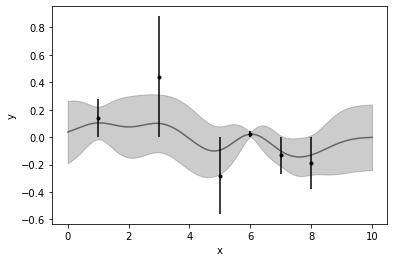

In [46]:
pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=y, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))


# add a periodic kernel

Initial parameters -2.86 -0.69
Initial ln-likelihood: 0.24
      fun: -3.135565123786608
 hess_inv: array([[ 8.98785738e+00,  1.86079099e+04,  1.38136321e-01],
       [ 1.86079099e+04,  1.83496591e+09, -1.00575243e+03],
       [ 1.38136321e-01, -1.00575243e+03,  2.95710468e-02]])
      jac: array([ 2.12451511e-07, -1.78626531e-10, -3.57776274e-06])
  message: 'Optimization terminated successfully.'
     nfev: 74
      nit: 54
     njev: 74
   status: 0
  success: True
        x: array([-8.02957073, 22.36716009,  0.49244052])
Optimized parameters -8.03 22.37
Optimized ln-likelihood: 3.14
      fun: 109.76693593685863
 hess_inv: array([[ 1.00387791e+00, -3.97986494e-02, -8.74834458e-05],
       [-3.97986494e-02,  2.16978543e+00, -1.98560511e-03],
       [-8.74834458e-05, -1.98560511e-03,  5.16166792e-06]])
      jac: array([-4.60413219e-09, -2.45651306e-07, -3.57623694e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 102
      nit: 14
     njev:

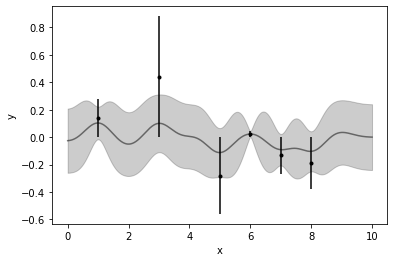

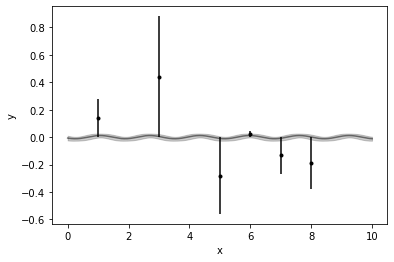

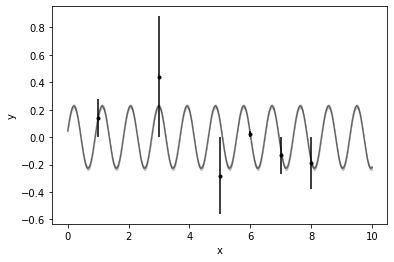

In [51]:
kernel = np.var(y) * kernels.Product(kernels.ExpSquaredKernel(0.5), kernels.CosineKernel(1))
gp = george.GP(kernel)
gp.compute(t, np.abs(y))

pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=y, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Initial parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)

pred, pred_var = gp.predict(y, t_pred, return_var=True)
pl.figure()
pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=y, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Optimized parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
print("Optimized ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

gp.compute(t, 0.1*np.abs(y))

pred, pred_var = gp.predict(y, t_pred, return_var=True)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)

pred, pred_var = gp.predict(y, t_pred, return_var=True)
pl.figure()
pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=y, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Optimized parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
print("Optimized ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
